<a href="https://colab.research.google.com/github/Ravus1/DATA-Club-ML-Model-Project-2023/blob/main/loanML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from scipy import stats

In [ ]:
df = pd.read_csv('loan_data.csv') #don't need index_col because we don't have an index
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
print(df.index) #just seeing how many entries are in the dataset

RangeIndex(start=0, stop=9578, step=1)


In [ ]:
df = pd.get_dummies(df, columns = ['purpose'])

In [ ]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not_fully_paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [ ]:
column_list = list(df.columns)
column_list

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not_fully_paid',
 'purpose_all_other',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [ ]:
df.describe()[column_list] #summary statistics of each factor

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
fig1 = px.box(df, y='int.rate')

fig1.show() #just to show distribution of one of the factors (for visuals, as example)

In [ ]:
def find_outliers(df):

  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3-q1

  outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]

  return outliers

In [ ]:
outliers = find_outliers(df["int.rate"])

print("number of outliers: " + str(len(outliers)))

number of outliers: 51


In [ ]:
df = df.drop(outliers.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [ ]:
outliers2 = find_outliers(df["installment"])

print("number of outliers: " + str(len(outliers2)))

number of outliers: 253


In [ ]:
df = df.drop(outliers2.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [ ]:
outliers3 = find_outliers(df["log.annual.inc"])

print("number of outliers: " + str(len(outliers3)))

number of outliers: 203


In [ ]:
df = df.drop(outliers3.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [ ]:
outliers4 = find_outliers(df["dti"])

print("number of outliers: " + str(len(outliers4)))

number of outliers: 0


In [ ]:
outliers5 = find_outliers(df["fico"])

print("number of outliers: " + str(len(outliers5)))

number of outliers: 6


In [ ]:
df = df.drop(outliers5.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [ ]:
outliers6 = find_outliers(df["days.with.cr.line"])

print("number of outliers: " + str(len(outliers6)))

number of outliers: 330


In [ ]:
df = df.drop(outliers6.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1,1,0,0,0,0,0,0
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [ ]:
outliers7 = find_outliers(df["revol.bal"])

print("number of outliers: " + str(len(outliers7)))

number of outliers: 645


In [ ]:
df = df.drop(outliers7.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1,1,0,0,0,0,0,0
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [ ]:
outliers8 = find_outliers(df["revol.util"])

print("number of outliers: " + str(len(outliers8)))

number of outliers: 0


In [ ]:
outliers9 = find_outliers(df["inq.last.6mths"])

print("number of outliers: " + str(len(outliers9)))

number of outliers: 390


In [ ]:
df = df.drop(outliers9.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,0,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0,1,0,0,0,0,0,0
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1,1,0,0,0,0,0,0
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0


In [ ]:
outliers10 = find_outliers(df["delinq.2yrs"])

print("number of outliers: " + str(len(outliers10)))

number of outliers: 901


In [ ]:
df = df.drop(outliers10.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,0,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0,1,0,0,0,0,0,0
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1,1,0,0,0,0,0,0
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0


In [ ]:
outliers11 = find_outliers(df["delinq.2yrs"])

print("number of outliers: " + str(len(outliers11)))

number of outliers: 0


In [ ]:
outliers12 = find_outliers(df["pub.rec"])

print("number of outliers: " + str(len(outliers12)))

number of outliers: 401


In [ ]:
df = df.drop(outliers12.index)

df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,0,0.1099,556.50,11.225243,17.84,727,6840.041667,18753,29.0,4,0,0,1,0,0,1,0,0,0,0
9567,0,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0,1,0,0,0,0,0,0
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0


In [ ]:
column_list.remove('credit.policy')
column_list.remove('not_fully_paid')

column_list

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'purpose_all_other',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [ ]:
X = df[column_list]

y = df['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)

param_grid = { 'n_estimators': [10,100,250,500],
              'max_depth': [3, 6, 8, 10, 12] #depth of tree
}

In [ ]:
rf = RandomForestClassifier()

grid = GridSearchCV(rf, param_grid, refit = True, verbose = 3, cv = 5,
                    return_train_score = True)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=3, n_estimators=10;, score=(train=0.867, test=0.866) total time=   0.0s
[CV 2/5] END max_depth=3, n_estimators=10;, score=(train=0.867, test=0.866) total time=   0.0s
[CV 3/5] END max_depth=3, n_estimators=10;, score=(train=0.867, test=0.866) total time=   0.0s
[CV 4/5] END max_depth=3, n_estimators=10;, score=(train=0.866, test=0.867) total time=   0.0s
[CV 5/5] END max_depth=3, n_estimators=10;, score=(train=0.867, test=0.867) total time=   0.0s
[CV 1/5] END max_depth=3, n_estimators=100;, score=(train=0.867, test=0.866) total time=   0.3s
[CV 2/5] END max_depth=3, n_estimators=100;, score=(train=0.867, test=0.866) total time=   0.3s
[CV 3/5] END max_depth=3, n_estimators=100;, score=(train=0.867, test=0.866) total time=   0.2s
[CV 4/5] END max_depth=3, n_estimators=100;, score=(train=0.866, test=0.867) total time=   0.2s
[CV 5/5] END max_depth=3, n_estimators=100;, score=(train=0.866, test=0.867) to

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 8, 10, 12],
                         'n_estimators': [10, 100, 250, 500]},
             return_train_score=True, verbose=3)

In [ ]:
print(grid.best_params_) #best param after tuning

#less factors, better results!

print(grid.best_estimator_) #model post hyper-param tuning

print(grid.best_score_) #prints best score

{'max_depth': 6, 'n_estimators': 250}
RandomForestClassifier(max_depth=6, n_estimators=250)
0.8666817138866719


In [ ]:
grid.best_estimator_.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
grid.best_estimator_.feature_importances_

array([0.13754811, 0.09284253, 0.12131381, 0.08409886, 0.1308119 ,
       0.10090667, 0.09096618, 0.10581469, 0.07907558, 0.        ,
       0.        , 0.01123728, 0.01746403, 0.00727984, 0.00347664,
       0.00427442, 0.00364482, 0.00924464])

['pub.rec', 'delinq.2yrs', 'purpose_educational', 'purpose_major_purchase', 'purpose_home_improvement', 'purpose_debt_consolidation', 'purpose_small_business', 'purpose_all_other', 'purpose_credit_card', 'inq.last.6mths', 'dti', 'revol.bal', 'installment', 'days.with.cr.line', 'revol.util', 'log.annual.inc', 'fico', 'int.rate']


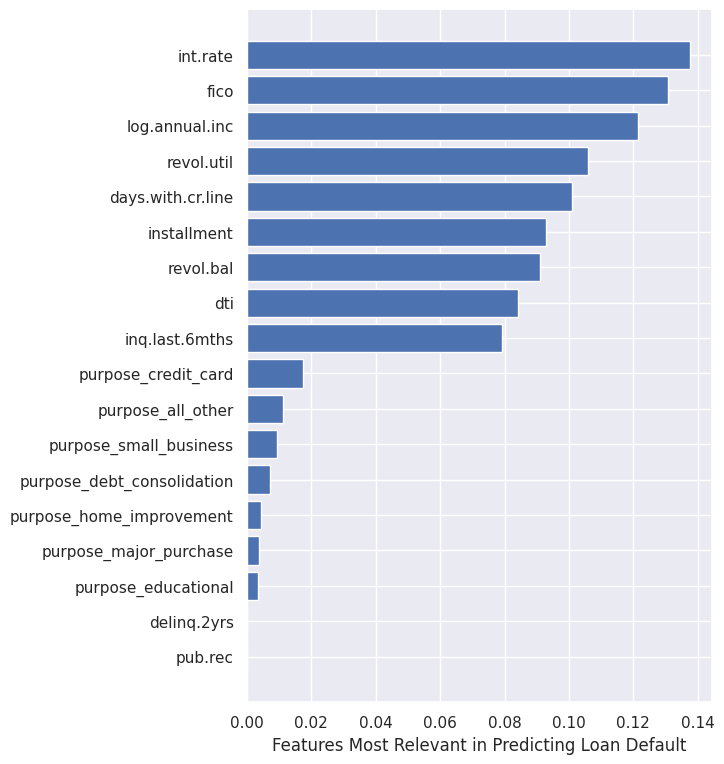

In [ ]:
def plot_feat_import (feat_list, feat_import, sort = True):

  if sort:

    idx = np.argsort(feat_import).astype(int)

    feat_list = [feat_list[_idx] for _idx in idx]

    feat_import = feat_import[idx]

    plt.barh(feat_list, feat_import)

    plt.gcf().set_size_inches(6, len(feat_list)/2)

    plt.xlabel('Features Most Relevant in Predicting Loan Default')

    return feat_list

sns.set()

x_feat_list = column_list

top_features = plot_feat_import(x_feat_list, grid.best_estimator_.feature_importances_)

print(top_features)